In [1]:
import sys; sys.path.append("..")
import torchvision
import numpy as np
from data import DataLoader
from layers import Linear, Module, Sequential, ReLU, Sigmoid
from activations import sigmoid, relu, softmax, tanh
from losses import CategoricalCrossEntropy
from optimizers import SGD, Adam
from data import DataLoader
from utils import Trainer
from metrics import categoricalAccuracy
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
mnist = torchvision.datasets.MNIST(".", download=True)

In [3]:
def onehot(label):
    out = np.zeros((10,))
    out[label] = 1
    return out

train_data = DataLoader(
    inputs = [ np.array(mnist[i][0]).flatten()/255.0 for i in range(2000) ],
    labels = [ onehot(mnist[i][1]) for i in range(2000) ],
    batch_size = 32
)

val_data = DataLoader(
    inputs = [ np.array(mnist[i][0]).flatten()/255.0 for i in range(2000, 3000) ],
    labels = [ onehot(mnist[i][1]) for i in range(2000, 3000) ],
    batch_size = 1
)

In [4]:
class MNISTDenseClassifier(Module):
    def __init__(self):
        self.linear1 = Linear(784, 32)
        self.linear2 = Linear(32, 10)
    
    def __call__(self, x):
        x = self.linear1(x)
        x = tanh(x)
        x = self.linear2(x)
        return softmax(x)

In [5]:
model = MNISTDenseClassifier()

history = Trainer(
    model = model,
    loss = CategoricalCrossEntropy(),
    optimizer = Adam(model.parameters(), 1e-3),
    train_data = train_data,
    val_data = val_data,
    metrics = [("accuracy", categoricalAccuracy)]
).train(15)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1 | train_loss: 1.8828 train_accuracy: 0.6588 || val_loss: 1.4942 val_accuracy: 0.7740
Epoch 2 | train_loss: 1.2530 train_accuracy: 0.8180 || val_loss: 1.0147 val_accuracy: 0.8010
Epoch 3 | train_loss: 0.8760 train_accuracy: 0.8548 || val_loss: 0.7524 val_accuracy: 0.8410
Epoch 4 | train_loss: 0.6641 train_accuracy: 0.8695 || val_loss: 0.6005 val_accuracy: 0.8530
Epoch 5 | train_loss: 0.5388 train_accuracy: 0.8866 || val_loss: 0.5224 val_accuracy: 0.8600
Epoch 6 | train_loss: 0.4617 train_accuracy: 0.8916 || val_loss: 0.4676 val_accuracy: 0.8750
Epoch 7 | train_loss: 0.4068 train_accuracy: 0.9012 || val_loss: 0.4417 val_accuracy: 0.8750
Epoch 8 | train_loss: 0.3708 train_accuracy: 0.9068 || val_loss: 0.4280 val_accuracy: 0.8820
Epoch 9 | train_loss: 0.3471 train_accuracy: 0.9103 || val_loss: 0.4298 val_accuracy: 0.8800
Epoch 10 | train_loss: 0.3247 train_accuracy: 0.9183 || val_loss: 0.4308 val_accuracy: 0.8800
Epoch 11 | train_loss: 0.3165 train_accuracy: 0.9138 || val_loss: 0.4

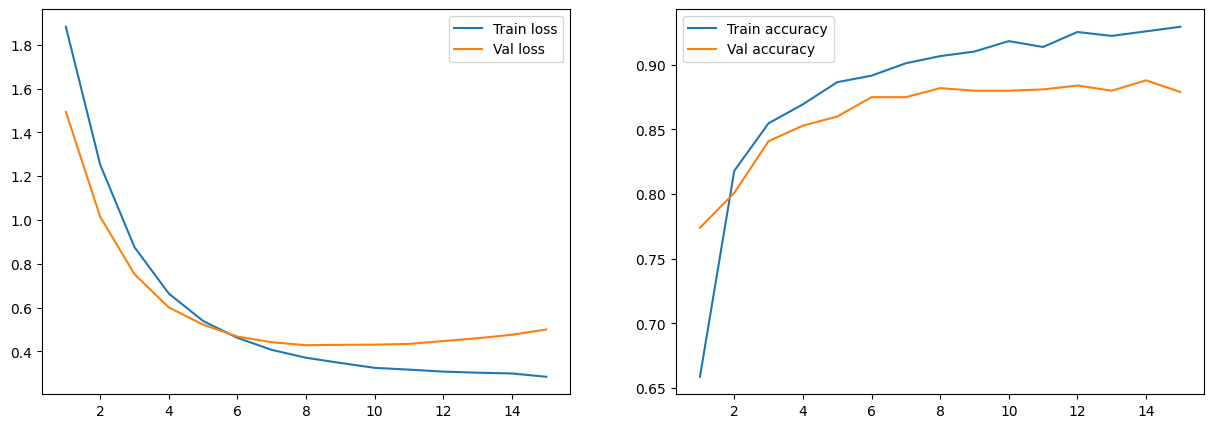

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot([h["epoch"] for h in history], [h["train_loss"] for h in history], label="Train loss")
plt.plot([h["epoch"] for h in history], [h["val_loss"] for h in history], label="Val loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot([h["epoch"] for h in history], [h["train_metrics"][0] for h in history], label="Train accuracy")
plt.plot([h["epoch"] for h in history], [h["val_metrics"][0] for h in history], label="Val accuracy")
plt.legend()
plt.show()